## Part 1 ‐ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15 minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [2]:
import json
from pandas.io.json import json_normalize
from collections import OrderedDict
from IPython.display import display
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
raw_json = json.loads(open("logins.json").read())
normed_json = json_normalize(raw_json,'login_time')
normed_json.tail()

,0
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38
93141,1970-04-13 18:54:23


Right away we can see here that this data is on the UNIX epoch, since it's safe to say that no one was loging into an app in 1970. This frequently happens when a date is saved in excel or the like, coverted to text from the epoch and then exported. To reverse we'll do this we'll add the number of days between 1/1/1970 and 1/1/2019 to each value.

In [4]:
normed_json[0].head()

0    1970-01-01 20:13:18
1    1970-01-01 20:16:10
2    1970-01-01 20:16:37
3    1970-01-01 20:16:36
4    1970-01-01 20:26:21
Name: 0, dtype: object

In [54]:
from time import time
from datetime import timedelta

normed_json['corrected_date'] = pd.to_datetime(normed_json[0]) + timedelta(days=17897)
normed_json.head()

,0,count,corrected_date
corrected_date,,,
2019-01-01 20:13:18,1970-01-01 20:13:18,1,2019-01-01 20:13:18
2019-01-01 20:16:10,1970-01-01 20:16:10,1,2019-01-01 20:16:10
2019-01-01 20:16:37,1970-01-01 20:16:37,1,2019-01-01 20:16:37
2019-01-01 20:16:36,1970-01-01 20:16:36,1,2019-01-01 20:16:36
2019-01-01 20:26:21,1970-01-01 20:26:21,1,2019-01-01 20:26:21


In [14]:
normed_json.set_index("corrected_date", inplace = True)
normed_json['count']=1
normed_json_min = normed_json.resample('15Min').sum()
normed_json_min.head()

,count
corrected_date,
2019-01-01 20:00:00,2
2019-01-01 20:15:00,6
2019-01-01 20:30:00,9
2019-01-01 20:45:00,7
2019-01-01 21:00:00,1


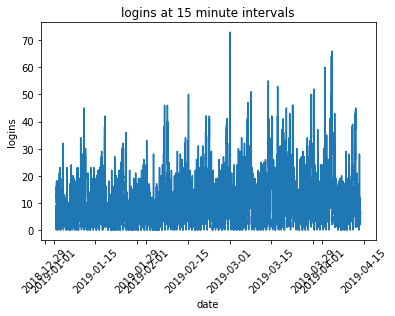

In [17]:
# plotting it out

plt.plot(normed_json_min.index, normed_json_min['count'])
plt.xticks(rotation = 45)
plt.xlabel('date')
plt.ylabel('logins')
plt.title('logins at 15 minute intervals');

In [32]:
normed_json_day = normed_json.resample('24h').sum()
normed_json_day

,count
corrected_date,
2019-01-01,112
2019-01-02,681
2019-01-03,793
2019-01-04,788
2019-01-05,459
...,...
2019-04-09,818
2019-04-10,1009
2019-04-11,1352


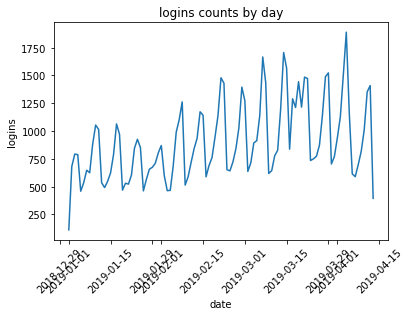

In [34]:
# histogram

plt.plot(normed_json_day.index, normed_json_day['count'])
plt.xticks(rotation = 45)
plt.xlabel('date')
plt.ylabel('logins')
plt.title('logins counts by day');

In [44]:
mon = normed_json.resample('W-MON').sum()
tues = normed_json.resample('W-TUE').sum()
weds = normed_json.resample('W-WED').sum()
thurs = normed_json.resample('W-THU').sum()
fri = normed_json.resample('W-FRI').sum()
sat = normed_json.resample('W-SAT').sum()
sun = normed_json.resample('W-SUN').sum()
sun

,count
corrected_date,
2019-01-06,3369
2019-01-13,5250
2019-01-20,4995
2019-01-27,4778
2019-02-03,4780
2019-02-10,5613
2019-02-17,6090
2019-02-24,7051
2019-03-03,6610


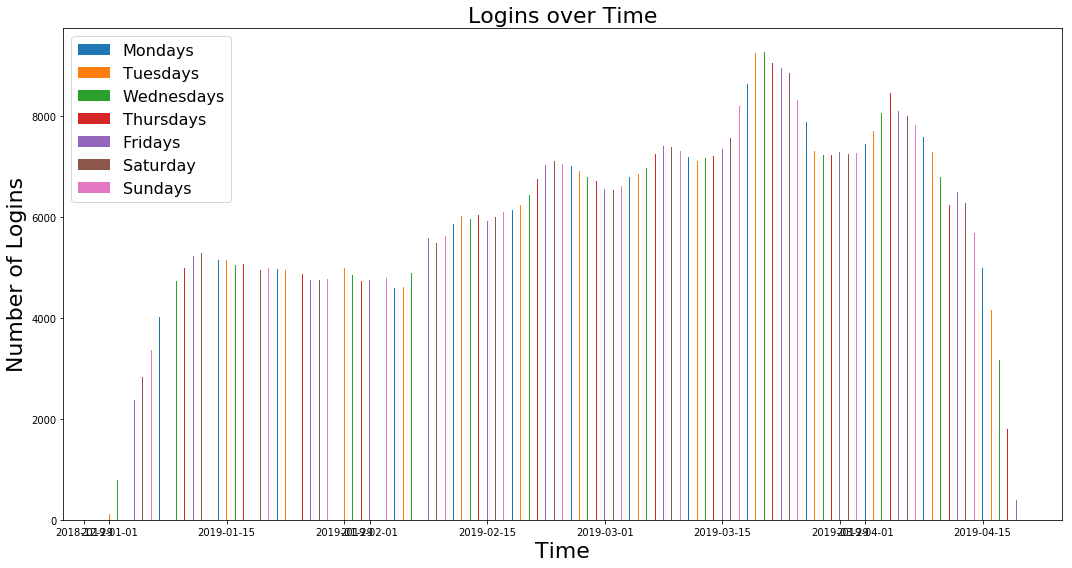

In [48]:
# line, scatterplot, and histograms of the binned data
fig, ax = plt.subplots(figsize = (15,8))
plt.xlabel('Time', fontsize = 22)
plt.ylabel('Number of Logins', fontsize = 22)
plt.title('Logins over Time', fontsize = 22)

plt.bar(mon.index, mon["count"], align= 'center', width = 0.1, label = "Mondays")
plt.bar(tues.index, tues["count"], label = 'Tuesdays', align = 'center', width = 0.1)
plt.bar(weds.index, weds["count"], label = "Wednesdays", align= 'center', width = 0.1)
plt.bar(thurs.index, thurs["count"], label = "Thursdays", align= 'center', width = 0.1)
plt.bar(fri.index, fri["count"], align= 'center', width = 0.1, label = "Fridays")
plt.bar(sat.index, sat["count"], label = 'Saturday', align = 'center', width = 0.1)
plt.bar(sun.index, sun["count"], label = "Sundays", align= 'center', width = 0.1)

plt.legend(loc='upper left', fontsize = 16)
plt.tight_layout()

In [99]:
hourly = normed_json.resample('1H').sum()
hourly

,count
corrected_date,
2019-01-01 20:00:00,24
2019-01-01 21:00:00,9
2019-01-01 22:00:00,21
2019-01-01 23:00:00,58
2019-01-02 00:00:00,53
...,...
2019-04-13 14:00:00,32
2019-04-13 15:00:00,19
2019-04-13 16:00:00,22


In [119]:
mon_H = hourly.resample('1H').sum()

In [ ]:
fakehrs = hourly

fakehrs.reset_index(level=0, inplace=True)

In [154]:
fakehrs['day_of_week'] = pd.to_datetime(fakehrs['corrected_date']).dt.dayofweek
fakehrs['hour_of_day'] = pd.to_datetime(fakehrs['corrected_date']).dt.hour

In [166]:
fakehrs  = fakehrs.groupby(['day_of_week', 'hour_of_day']).sum()
fakehrs.reset_index(inplace=True)

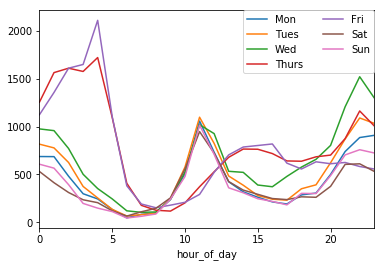

In [180]:
df = fakehrs.pivot(index='hour_of_day', columns='day_of_week', values='count')

df.plot()
plt.legend(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'],ncol=2, borderaxespad=0.)

## Analysis

So we see big spikes on Thursday and Friday mornings, regular lunch spikes every other day, and pretty even flow otherwise with the classic 'drive times'.

# Part 2 ‐ Experiment and metrics design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
    
-  What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

        
- Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: a. how you will implement the experiment b. what statistical test(s) you will conduct to verify the significance of the observation c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

## Answer:

For key metrics I'd consider first the business use case as something like cost per revenue; if Ultimate is spending as much in toll costs to drive across the bridge, then it's not worth it on it's face. So I'd first propose considering number of drivers who accept the cost and how many additional fares that creates. Second would be if we see an increase in usage in the respective cities over all due to increased driver availability.

For an Experiment I'd consider doing a randomized controlled experiment where drivers are split into three groups, 

- toll reimbursement
- new city bonus
- control

I'd use the new city bonus to see if drivers would be more engaged by the idea of a 'bonus' as opposed to a reimbursement. Humans are bad at considering sunk cost but will do a lot of a 'bonus' even if it's not particularly valuable. 

# Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

The data is in the attached file ultimate_data_challenge.json.

Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

In [182]:
file = open('ultimate_data_challenge.json', 'r')
riders = pd.DataFrame(json.load(file))
file.close()

riders.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [183]:
print(riders.shape)

(50000, 12)


First I'm checking for any miss values, visualizing what I'd guess are the key metrics (average ratings and surge), and then creating a feature for active beyond six months. 

In [184]:
riders.isnull().values.any()

True

In [186]:
riders.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

While not particularly concerned about missing phone numbers, missing a little over 15% of the ratings of drivers is perhaps a problem.

In [189]:
riders.avg_rating_of_driver.mean()

4.6015592912744685

Since the models I'm going to employ can deal with missing values I'm going to leave that alone for the time being but we know they're there so we can come back as needed.

creating a greater than six months feature, so we have a binary value for our retention metric.

In [200]:
riders['signup_date']=pd.to_datetime(riders['signup_date'])
riders['last_trip_date']=pd.to_datetime(riders['last_trip_date'])
riders

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,King's Landing,0,2014-01-25,5.0,1.00,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.00,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.00,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5


In [198]:
riders['signup_date']

0       2014-01-25
1       2014-01-29
2       2014-01-06
3       2014-01-10
4       2014-01-27
           ...    
49995   2014-01-25
49996   2014-01-24
49997   2014-01-31
49998   2014-01-14
49999   2014-01-18
Name: signup_date, Length: 50000, dtype: datetime64[ns]